In [1]:
# Step 1: Load the dataset and explore basic info

import pandas as pd

# Load dataset (replace the path with your actual file path if different)
df = pd.read_csv('Datasets/spotify_songs.csv')

# Display first 10 rows
print("First 10 rows of the dataset:")
display(df.head(10))

# Show dataset shape
print("\nDataset Shape (rows, columns):", df.shape)

# Show column names
print("\nColumn Names:")
print(df.columns.tolist())


First 10 rows of the dataset:


artist_name                track_id  \
0          YG  2RM4jf1Xa9zPgMGRDiht8O   
1          YG  1tHDG53xJNGsItRA3vfVgs   
2       R3HAB  6Wosx2euFPMT14UXiWudMy   
3  Chris Cooq  3J2Jpw61sO7l6Hc7qdYV91   
4  Chris Cooq  2jbYvQCyPgX3CdmAzeVeuS   
5       Curbo  26Y1lX7ZOpw9Ql3gGAlqLK   
6  Bingo Play  5eIyK73BrxHLnly4F9PWqg   
7     G Herbo  13Mf2ZBpfNkgWJowvM5hXh   
8     34 Feet  7BQaRTHk44DkMhIVNcXy2D   
9  Chris Cooq  049RxG2laEl9U1PGYeIqLV   

                                       track_name  acousticness  danceability  \
0  Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj      0.005820         0.743   
1                    BAND DRUM (feat. A$AP Rocky)      0.024400         0.846   
2                                   Radio Silence      0.025000         0.603   
3                                         Lactose      0.029400         0.800   
4                             Same - Original mix      0.000035         0.783   
5                       Debauchery - Original mix      0.001150         0.810   
6                          Grandma - Original mix      0.000539         0.819   
7                                     Bon appétit      0.115000         0.885   
8                            Among - Original mix      0.000058         0.740   
9                           Hazard - Original mix      0.000081         0.813   

   duration_ms  energy  instrumentalness  key  liveness  loudness  mode  \
0       238373   0.339             0.000    1    0.0812    -7.678     1   
1       214800   0.557             0.000    8    0.2860    -7.259     1   
2       138913   0.723             0.000    9    0.0824    -5.890     0   
3       125381   0.579             0.912    5    0.0994   -12.118     0   
4       124016   0.792             0.878    7    0.0332   -10.277     1   
5       124016   0.417             0.919    9    0.1060   -10.783     0   
6       132742   0.720             0.863    4    0.0727    -8.895     0   
7       181838   0.348             0.000    9    0.1070   -12.569     1   
8       124016   0.472             0.847    8    0.0959    -9.008     1   
9       132742   0.731             0.910   11    0.0727    -8.932     1   

   speechiness    tempo  time_signature  valence  popularity  
0       0.4090  203.927               4    0.118          15  
1       0.4570  159.009               4    0.371           0  
2       0.0454  114.966               4    0.382          56  
3       0.0701  123.003               4    0.641           0  
4       0.0661  120.047               4    0.928           0  
5       0.0793  120.025               4    0.837           0  
6       0.1510  124.003               4    0.934           0  
7       0.4510  142.111               4    0.180           0  
8       0.0551  120.034               4    0.622           0  
9       0.0697  124.031               4    0.944           0


Dataset Shape (rows, columns): (2000, 17)

Column Names:
['artist_name', 'track_id', 'track_name', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence', 'popularity']


In [2]:
# Step 2: Select only numeric audio features (excluding popularity)

# Drop non-numeric + popularity
numeric_features = df.drop(columns=['artist_name', 'track_id', 'track_name', 'popularity'])

# Show first 5 rows of selected features
print("First 5 rows of numeric audio features:")
display(numeric_features.head())

# Show column names to confirm
print("\nSelected numeric columns:")
print(numeric_features.columns.tolist())


First 5 rows of numeric audio features:


acousticness  danceability  duration_ms  energy  instrumentalness  key  \
0      0.005820         0.743       238373   0.339             0.000    1   
1      0.024400         0.846       214800   0.557             0.000    8   
2      0.025000         0.603       138913   0.723             0.000    9   
3      0.029400         0.800       125381   0.579             0.912    5   
4      0.000035         0.783       124016   0.792             0.878    7   

   liveness  loudness  mode  speechiness    tempo  time_signature  valence  
0    0.0812    -7.678     1       0.4090  203.927               4    0.118  
1    0.2860    -7.259     1       0.4570  159.009               4    0.371  
2    0.0824    -5.890     0       0.0454  114.966               4    0.382  
3    0.0994   -12.118     0       0.0701  123.003               4    0.641  
4    0.0332   -10.277     1       0.0661  120.047               4    0.928


Selected numeric columns:
['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence']


In [3]:
# Step 3: Check for missing values and handle them

# Check missing values
print("Missing values per column:")
print(numeric_features.isnull().sum())

# Option 1: Drop rows with missing values
numeric_features_dropped = numeric_features.dropna()

print("\nShape after dropping rows with missing values:", numeric_features_dropped.shape)

# Option 2: Mean imputation (if we want to keep all rows)
numeric_features_imputed = numeric_features.fillna(numeric_features.mean())

print("\nShape after mean imputation:", numeric_features_imputed.shape)


Missing values per column:
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

Shape after dropping rows with missing values: (2000, 13)

Shape after mean imputation: (2000, 13)


In [4]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Fit and transform the data
scaled_features = scaler.fit_transform(numeric_features_imputed)

# Convert back to DataFrame for easier handling
scaled_df = pd.DataFrame(scaled_features, columns=numeric_features_imputed.columns)

print("First 5 rows after scaling:")
display(scaled_df.head())


First 5 rows after scaling:


acousticness  danceability  duration_ms    energy  instrumentalness  \
0     -0.967037      0.941458     0.181854 -0.741369         -0.639586   
1     -0.915970      1.475533    -0.028861  0.041101         -0.639586   
2     -0.914321      0.215531    -0.707203  0.636926         -0.639586   
3     -0.902227      1.237014    -0.828163  0.120065          1.889796   
4     -0.982937      1.148866    -0.840365  0.884588          1.795499   

        key  liveness  loudness      mode  speechiness     tempo  \
0 -1.168616 -0.660206  0.405830  0.833616     2.689760  2.859697   
1  0.759793  0.568582  0.466418  0.833616     3.112978  1.342004   
2  1.035280 -0.653006  0.664376 -1.199593    -0.516111 -0.146124   
3 -0.066668 -0.551007 -0.236197 -1.199593    -0.298330  0.125430   
4  0.484306 -0.948203  0.030013  0.833616    -0.333598  0.025553   

   time_signature   valence  
0        0.241178 -1.296817  
1        0.241178 -0.308061  
2        0.241178 -0.265072  
3        0.241178  0.747132  
4        0.241178  1.868764

k = 2, Silhouette Score = 0.2692
k = 3, Silhouette Score = 0.1349
k = 4, Silhouette Score = 0.1407
k = 5, Silhouette Score = 0.1401
k = 6, Silhouette Score = 0.1371
k = 7, Silhouette Score = 0.1390
k = 8, Silhouette Score = 0.1256
k = 9, Silhouette Score = 0.1237
k = 10, Silhouette Score = 0.1185


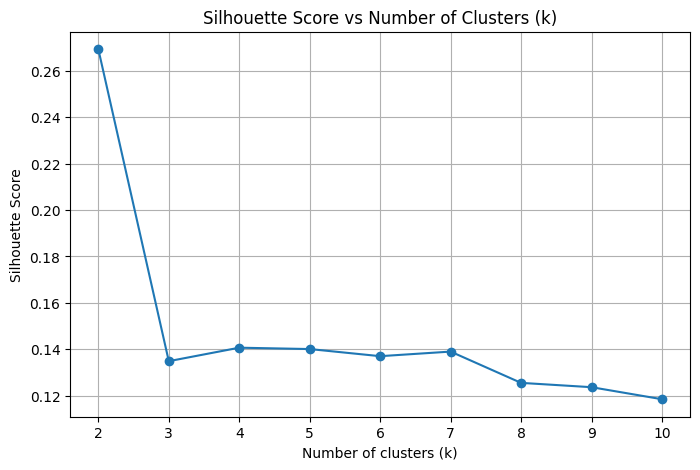

In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

silhouette_scores = []

# Try k from 2 to 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(scaled_df)
    
    # Compute silhouette score
    score = silhouette_score(scaled_df, cluster_labels)
    silhouette_scores.append(score)
    print(f"k = {k}, Silhouette Score = {score:.4f}")

# Plot k vs Silhouette Score
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title("Silhouette Score vs Number of Clusters (k)")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()


In [7]:
# Find the best k (maximum silhouette score)
best_k = range(2, 11)[silhouette_scores.index(max(silhouette_scores))]
best_score = max(silhouette_scores)

print(f"\n✅ Best k value: {best_k} with Silhouette Score = {best_score:.4f}")


✅ Best k value: 2 with Silhouette Score = 0.2692


In [8]:
# Step 7: Fit K-Means with the chosen k and assign cluster labels

# Initialize KMeans with the best k
kmeans_final = KMeans(n_clusters=best_k, random_state=42, n_init=10)

# Fit and predict cluster labels
df['Cluster'] = kmeans_final.fit_predict(scaled_df)

# Show first 10 rows with cluster labels
print("First 10 rows with assigned cluster labels:")
display(df.head(10))


First 10 rows with assigned cluster labels:


artist_name                track_id  \
0          YG  2RM4jf1Xa9zPgMGRDiht8O   
1          YG  1tHDG53xJNGsItRA3vfVgs   
2       R3HAB  6Wosx2euFPMT14UXiWudMy   
3  Chris Cooq  3J2Jpw61sO7l6Hc7qdYV91   
4  Chris Cooq  2jbYvQCyPgX3CdmAzeVeuS   
5       Curbo  26Y1lX7ZOpw9Ql3gGAlqLK   
6  Bingo Play  5eIyK73BrxHLnly4F9PWqg   
7     G Herbo  13Mf2ZBpfNkgWJowvM5hXh   
8     34 Feet  7BQaRTHk44DkMhIVNcXy2D   
9  Chris Cooq  049RxG2laEl9U1PGYeIqLV   

                                       track_name  acousticness  danceability  \
0  Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj      0.005820         0.743   
1                    BAND DRUM (feat. A$AP Rocky)      0.024400         0.846   
2                                   Radio Silence      0.025000         0.603   
3                                         Lactose      0.029400         0.800   
4                             Same - Original mix      0.000035         0.783   
5                       Debauchery - Original mix      0.001150         0.810   
6                          Grandma - Original mix      0.000539         0.819   
7                                     Bon appétit      0.115000         0.885   
8                            Among - Original mix      0.000058         0.740   
9                           Hazard - Original mix      0.000081         0.813   

   duration_ms  energy  instrumentalness  key  liveness  loudness  mode  \
0       238373   0.339             0.000    1    0.0812    -7.678     1   
1       214800   0.557             0.000    8    0.2860    -7.259     1   
2       138913   0.723             0.000    9    0.0824    -5.890     0   
3       125381   0.579             0.912    5    0.0994   -12.118     0   
4       124016   0.792             0.878    7    0.0332   -10.277     1   
5       124016   0.417             0.919    9    0.1060   -10.783     0   
6       132742   0.720             0.863    4    0.0727    -8.895     0   
7       181838   0.348             0.000    9    0.1070   -12.569     1   
8       124016   0.472             0.847    8    0.0959    -9.008     1   
9       132742   0.731             0.910   11    0.0727    -8.932     1   

   speechiness    tempo  time_signature  valence  popularity  Cluster  
0       0.4090  203.927               4    0.118          15        0  
1       0.4570  159.009               4    0.371           0        0  
2       0.0454  114.966               4    0.382          56        0  
3       0.0701  123.003               4    0.641           0        0  
4       0.0661  120.047               4    0.928           0        0  
5       0.0793  120.025               4    0.837           0        0  
6       0.1510  124.003               4    0.934           0        0  
7       0.4510  142.111               4    0.180           0        0  
8       0.0551  120.034               4    0.622           0        0  
9       0.0697  124.031               4    0.944           0        0

In [9]:
# Step 8: Compute average values of each audio feature per cluster

cluster_summary = df.groupby('Cluster')[numeric_features_imputed.columns].mean()

print("Average feature values per cluster:")
display(cluster_summary)


Average feature values per cluster:


acousticness  danceability    duration_ms    energy  \
Cluster                                                        
0            0.197181      0.628822  205795.611695  0.669295   
1            0.868640      0.346861  256980.309623  0.151530   

         instrumentalness       key  liveness   loudness      mode  \
Cluster                                                              
0                0.144300  5.227989  0.202977  -7.430891  0.576873   
1                0.505432  5.286611  0.153850 -20.207732  0.631799   

         speechiness       tempo  time_signature   valence  
Cluster                                                     
0           0.121569  123.371741        3.944152  0.489092  
1           0.047790  106.296387        3.698745  0.324799

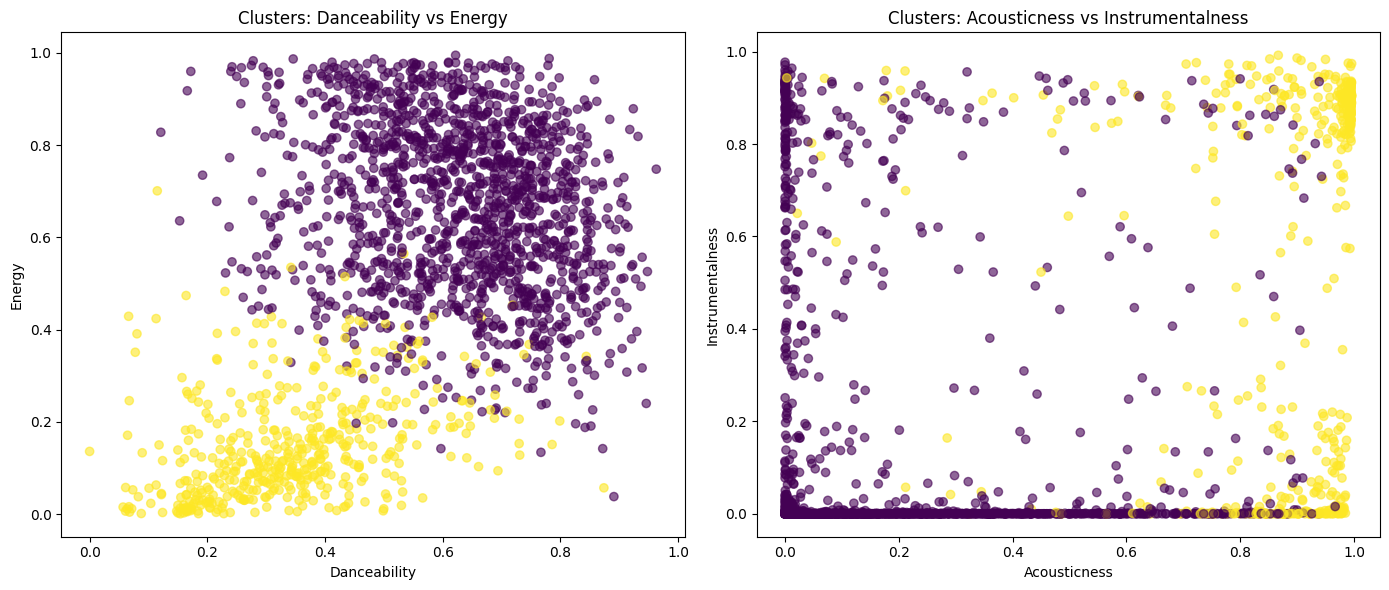

In [10]:
import matplotlib.pyplot as plt

# Step 9: 2D scatter plots of clusters
plt.figure(figsize=(14,6))

# Plot 1: Danceability vs Energy
plt.subplot(1,2,1)
plt.scatter(df['danceability'], df['energy'], c=df['Cluster'], cmap='viridis', alpha=0.6)
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.title('Clusters: Danceability vs Energy')

# Plot 2: Acousticness vs Instrumentalness
plt.subplot(1,2,2)
plt.scatter(df['acousticness'], df['instrumentalness'], c=df['Cluster'], cmap='viridis', alpha=0.6)
plt.xlabel('Acousticness')
plt.ylabel('Instrumentalness')
plt.title('Clusters: Acousticness vs Instrumentalness')

plt.tight_layout()
plt.show()
